<a href="https://colab.research.google.com/github/Akramtahaxzx/machine-learning/blob/master/implementing_the_K_Means_Algorithm_using_the_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn import datasets
import os



In [3]:
#Loading the iris dataset
iris = datasets.load_iris()

In [4]:
#Checking the dataset
iris.data
print(iris.data.shape)

(150, 4)


In [5]:
#Checking the featues
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
#Scaling the data for clustering for better efficiency
x = scale(iris.data)

In [7]:
#checking the target
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# Doing the clustering 
clustering = KMeans(n_clusters =3,random_state=1)

In [9]:
#Fitting the algorithm
clustering.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [10]:
#Labelling the cluster
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [11]:
#Adding the visualisation
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#Converting into DataFrame
iris_df = pd.DataFrame(iris.data)

In [13]:
iris_df.columns=['sepal_length','sepal_width','petal_length','petal_width']

In [14]:
y=pd.DataFrame(iris.target)
y.columns=['targets']

In [15]:
y.head()

,targets
0,0
1,0
2,0
3,0
4,0


Text(0.5, 1.0, 'The actual dataset')

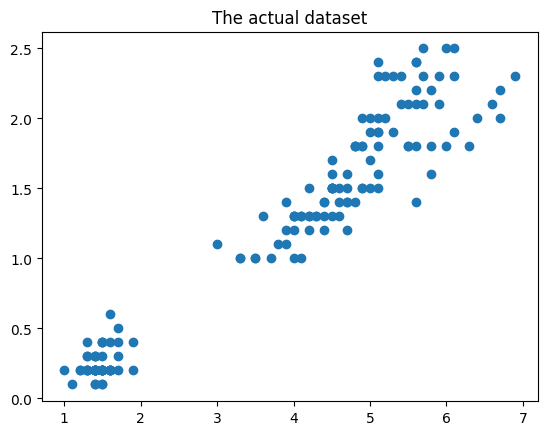

In [16]:
plt.scatter(x=iris_df.petal_length,y=iris_df.petal_width)
plt.title("The actual dataset")

In [17]:
import numpy as np
color =np.array(['red','blue','green'])

Text(0.5, 1.0, 'The actual dataset')

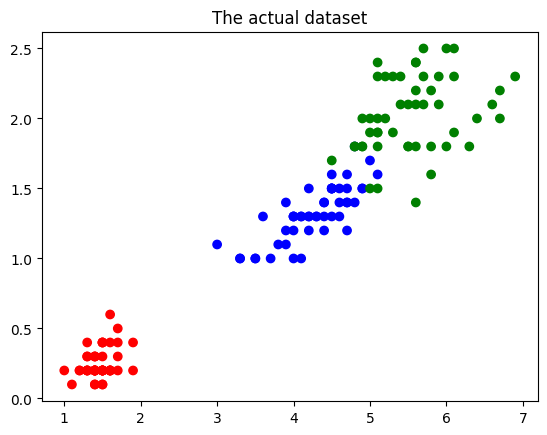

In [18]:
#adding the colors
plt.scatter(x=iris_df.petal_length,y=iris_df.petal_width,c=color[iris.target])
plt.title("The actual dataset")

Text(0.5, 1.0, 'The dataset post clustering')

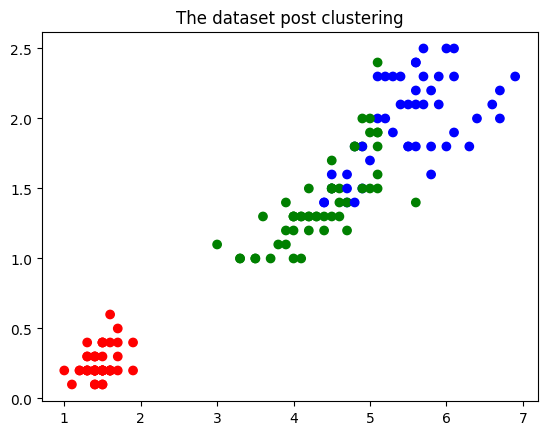

In [19]:
#After the clustering
#adding the colors
color2=np.array(['green','red','blue'])
plt.scatter(x=iris_df.petal_length,y=iris_df.petal_width,c=color2[clustering.labels_])
plt.title("The dataset post clustering")

In [20]:
#finding distortion for every k- value

# K = 1 to 10,for every k value we calculate distortion,then we plot the line graph between K and Distortion
distortions = []
K = range(1,18)
print(K)

range(1, 18)


In [21]:
#importing the cdist package
from scipy.spatial.distance import cdist
import math
iris_df.head()
X = iris_df.loc[:,['petal_length','petal_width']]

In [22]:
# Finding the distortion in every set as the min Euclidean distance between two points
for k in K: 
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeans_model.cluster_centers_,"euclidean"),axis=1))/X.shape[0])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [23]:
#printing the distortion
distortions

[1.707364436891335,
 0.583920126422277,
 0.36876646966749166,
 0.2995555809034137,
 0.26508349289751987,
 0.23523461562225223,
 0.21228408527321674,
 0.195644382783966,
 0.18498100281029575,
 0.17060520127478893,
 0.16349194590693475,
 0.1584100099050051,
 0.14883619424585062,
 0.1464436273098217,
 0.13601185172882274,
 0.13275689054456838,
 0.12423829547072904]

range(1, 18)
0.12423829547072904


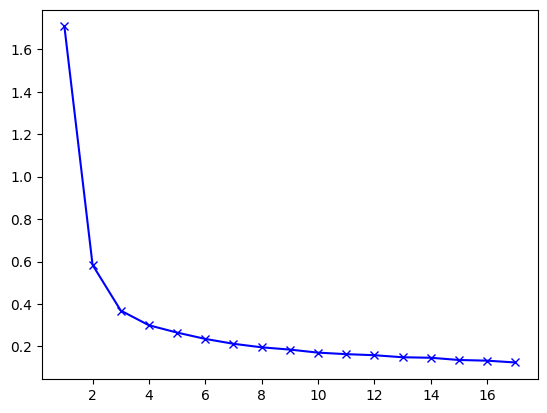

In [24]:
#Plot distortions againt K value
print(K)
# checking for min of K value
print(np.min(distortions))
#Plotting for change in K value
plt.plot(K,distortions,'bx-')